In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk4a_tradedataBWA.csv?raw=true'
df = pd.read_csv(url, sep='\t')

## 1a

In [7]:
total = df[['description', 'year', 'x']]
total = total.pivot(index='description', columns='year', values='x')
total['growth'] = (total[2023] - total[2000]) / total[2000] * 100

total

year,2000,2023,growth
description,,,
"Aircraft, spacecraft and parts thereof",4566759,4956454,8.533295
Albuminoidal substances; modified starches; glues; enzymes,28255,113896,303.100336
Aluminium and articles thereof,71525,4539418,6246.617267
Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes,2114015,1055469,-50.072776
Animal originated products; not elsewhere specified or included,2707,15564,474.953823
...,...,...,...
"Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof",35543,163635,360.386011
Wood and articles of wood; wood charcoal,423143,1127203,166.388195
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",36380,3618,-90.054975


## 1b

In [ ]:
df_00 = df[df['year'] == 2000].copy().reset_index(drop=True)
df_00['x_tot'] = df_00['x'].sum()
df_00['x_wd_tot'] = df_00['x_wd'].sum()
df_00['sh_hs2'] = df_00['x'] / df_00['x_wd']
df_00['sh_wd'] = df_00['x_tot'] / df_00['x_wd_tot']
df_00['rca'] = df_00['sh_hs2'] / df_00['sh_wd']

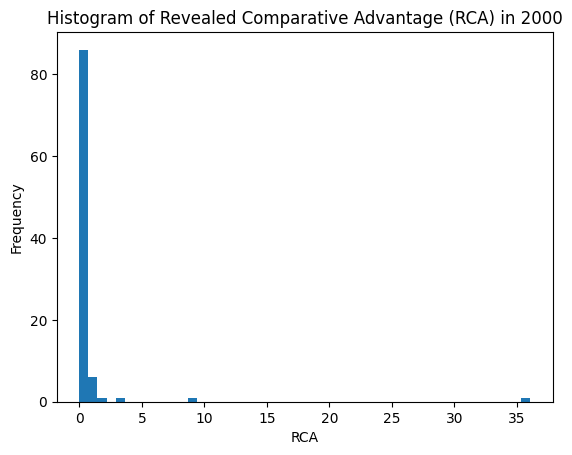

In [75]:
plt.hist(df_00['rca'], bins=50)
plt.xlabel('RCA')
plt.ylabel('Frequency')
plt.title('Histogram of Revealed Comparative Advantage (RCA) in 2000')
plt.show()

In [76]:
len(df_00[df_00['rca'] >= 1])

7

## 1c

In [87]:
df_23 = df[df['year'] == 2023].copy().reset_index(drop=True)
df_23['x_tot'] = df_23['x'].sum()
df_23['x_wd_tot'] = df_23['x_wd'].sum()
df_23['sh_hs2'] = df_23['x'] / df_23['x_wd']
df_23['sh_wd'] = df_23['x_tot'] / df_23['x_wd_tot']
df_23['rca'] = df_23['sh_hs2'] / df_23['sh_wd']

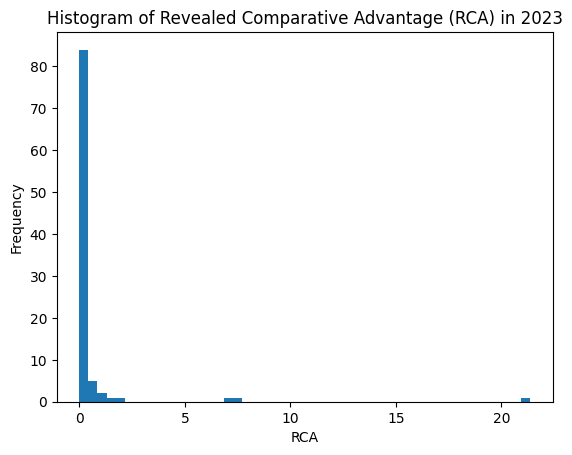

In [78]:
plt.hist(df_23['rca'], bins=50)
plt.xlabel('RCA')
plt.ylabel('Frequency')
plt.title('Histogram of Revealed Comparative Advantage (RCA) in 2023')
plt.show()

In [79]:
len(df_23[df_23['rca'] >= 1])

6

## 1d

In [80]:
df_00[df_00['hs2'] == 71]

,index,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca
70,140,BWA,71,"Natural, cultured pearls; precious, semi-preci...",2000,2305254826,158544560128,2771865783,6876776872512,0.01454,0.000403,36.07284


In [81]:
df_23[df_23['hs2'] == 71]

,index,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca
70,141,BWA,71,"Natural, cultured pearls; precious, semi-preci...",2023,4357365455,974754676736,5500564093,26297198597376,0.00447,0.000209,21.371299


Botswana decreased its comparative advantage in HS71. Likely due to world market exposure to artifical diamonds.

## 1e

In [82]:
df_00['rca_23'] = df_23['rca']

In [84]:
df_00['rca_change'] = df_00['rca_23'] - df_00['rca']

In [90]:
df_00.sort_values(by='rca_change', ascending=False).head(3)

,index,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca,rca_23,rca_change
0,0,BWA,1,Animals; live,2000,235090,9799775232,2771865783,6876776872512,0.000024,0.000403,0.059516,7.301145,7.241630
25,50,BWA,26,"Ores, slag and ash",2000,137671,26425796608,2771865783,6876776872512,0.000005,0.000403,0.012925,7.197501,7.184576
76,152,BWA,78,Lead and articles thereof,2000,9434,1736383232,2771865783,6876776872512,0.000005,0.000403,0.013479,1.659831,1.646352


Botswana found significant comparative advantage in agriculture and minerals extraction (besides precious metals)

## 1f

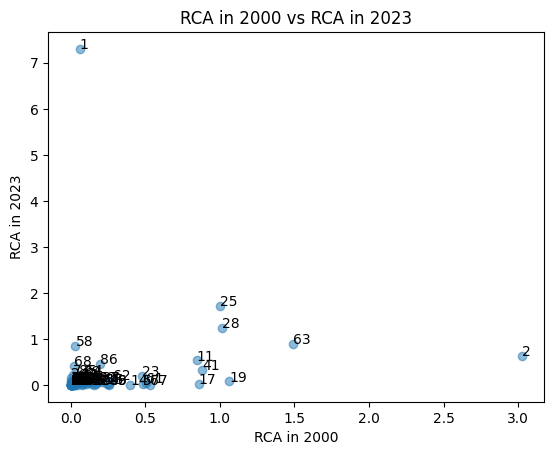

In [115]:
df_red = df_00[~df_00['hs2'].isin([26, 71, 72, 73, 74, 75,
                                   76, 78, 79, 80])].copy().reset_index(drop=True)

fig, ax = plt.subplots()

x = df_red['rca']
y = df_red['rca_23']
n = df_red['hs2']

ax.scatter(x, y, alpha=0.5)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_xlabel('RCA in 2000')
ax.set_ylabel('RCA in 2023')
ax.set_title('RCA in 2000 vs RCA in 2023')

plt.show()

# 2)

In [159]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk4b_tradedataZAF.csv?raw=true'
df1 = pd.read_csv(url, sep='\t')

## 2a)

In [160]:
world = df1[df1['iso'] == 'RoW']['xusa'].sum()
world_tot = df1['xusa'].sum()

In [162]:
df1 = df1[df1['iso'] == 'ZAF'].copy().reset_index(drop=True)

In [163]:
df1['x_wd'] = world
df1['x_wd_tot'] = world_tot

In [164]:
df1['x_tot'] = df1['xusa'].sum()

In [167]:
df1['sh_hs2'] = df1['xusa'] / df1['x_wd']
df1['sh_wd'] = df1['x_tot'] / df1['x_wd_tot']
df1['rca'] = df1['sh_hs2'] / df1['sh_wd']

## 2b)

In [170]:
df1.sort_values(by='rca', ascending=False).head(5)

,year,iso,hs2,description,xusa,dtariff_zaf,x_wd,x_wd_tot,x_tot,sh_hs2,sh_wd,rca
61,2023,ZAF,71,"NATURAL OR CULTURED PEARLS, PRECIOUS OR SEMI-P...",2.954000e+09,0.000055,3.739763e+12,3.748076e+12,8.312755e+09,0.000790,0.002218,0.356147
73,2023,ZAF,87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,1.218000e+09,0.051481,3.739763e+12,3.748076e+12,8.312755e+09,0.000326,0.002218,0.146848
66,2023,ZAF,76,ALUMINIUM AND ARTICLES THEREOF,5.957000e+08,0.331613,3.739763e+12,3.748076e+12,8.312755e+09,0.000159,0.002218,0.071820
70,2023,ZAF,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",5.222000e+08,0.262371,3.739763e+12,3.748076e+12,8.312755e+09,0.000140,0.002218,0.062959
62,2023,ZAF,72,IRON AND STEEL,4.187000e+08,-0.008577,3.739763e+12,3.748076e+12,8.312755e+09,0.000112,0.002218,0.050480


## 2c)

Text(0.5, 1.0, 'RCA vs Duty Tariff for South Africa')

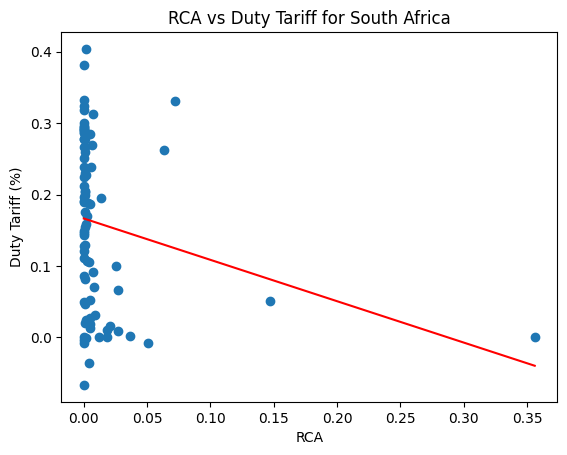

In [174]:
plt.scatter(df1['rca'], df1['dtariff_zaf'])
plt.plot(np.unique(df1['rca']),
         np.poly1d(np.polyfit(df1['rca'], df1['dtariff_zaf'], 1))(np.unique(df1['rca'])), color='red')
plt.xlabel('RCA')
plt.ylabel('Duty Tariff (%)')
plt.title('RCA vs Duty Tariff for South Africa')